In [46]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
from IPython.display import display
data = pd.read_csv(r"C:\Users\User\Desktop\새 폴더\healthcare-dataset-stroke-data.csv")   #데이터프레임
df = data.copy()
df.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


- Private': 사립/민간 기업
- 'Self-employed': 자영업
- 'Govt_job': 정부 공무원
- 'children': 어린이 (직장에 속하지 않는 경우, 또는 어린이들을 의미합니다)
- 'Never_worked': 취업 경험이 없음 (직장에 아직 속하지 않았거나, 취업 경력이 없는 경우)

In [4]:
df['stroke'].value_counts() #stroke 1인 값이 적음을 확인

stroke
0    4861
1     249
Name: count, dtype: int64

In [48]:
#bmi 결측치 200여 건 중 뇌졸중이 존재하면서 bmi가 결측치인 경우가 40건
nan_bmi_stroke = df[(df['bmi'].isnull()) & (df['stroke'] == 1)].shape[0]
nan_bmi_stroke

40

In [6]:
#뇌졸중이 있는 경우의 bmi의 평균값 30.47임을 확인 ->
mean_bmi = df[df['stroke'] == 1]['bmi']
mean_bmi.mean()

30.471291866028707

In [ ]:
# #이상치 제거 필요. bmi 최대값은 40임. 40이상은 이상치에 해당.
# df['bmi'].unique()

In [49]:
#뇌졸중이 존재하면서 bmi값이 null상태인 경우에 평균값 추가
df[df['stroke'] == 1]['bmi'].fillna('30.4')

0      36.6
1      30.4
2      32.5
3      34.4
4      24.0
       ... 
244    36.7
245    30.9
246    29.3
247    30.4
248    19.6
Name: bmi, Length: 249, dtype: object

In [50]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [52]:
#뇌졸중 존재X하지 않으면서 bmi가 nan인 결측치는 제거
df = df.dropna()

In [53]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [54]:
df = df[df['gender'] != 'Other'] #other 행 삭제
df.drop('id', inplace = True, axis = 1) #id컬럼 삭제, id의 중복값은 없었음.

In [55]:
df['gender'].value_counts() #other 삭제 완료 확인

gender
Female    2897
Male      2011
Name: count, dtype: int64

In [13]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

- 'Private': 사립/민간 기업
- 'Self-employed': 자영업
- 'Govt_job': 정부 공무원
- 'children': 어린이
- 'Never_worked': 취업 경험이 없음

In [57]:
df.info()
#object 문자 데이터(gender, ever_married, work_type, work_type, Residence_type, smoking_status)

<class 'pandas.core.frame.DataFrame'>
Index: 4908 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   object 
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   ever_married       4908 non-null   object 
 5   work_type          4908 non-null   object 
 6   Residence_type     4908 non-null   object 
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   object 
 10  stroke             4908 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.1+ KB


In [58]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4908.000000,4908.000000,4908.000000,4908.000000,4908.00000,4908.000000
mean,42.868810,0.091891,0.049511,105.297402,28.89456,0.042584
std,22.556128,0.288901,0.216954,44.425550,7.85432,0.201937
min,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,25.000000,0.000000,0.000000,77.067500,23.50000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.10000,0.000000
75%,60.000000,0.000000,0.000000,113.495000,33.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


In [33]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

    'id': 식별자(삭제)
    'gender': 성별
    'age': 나이
    'hypertension': 고혈압 **
    'heart_disease': 심장 질환 **
    'ever_married': 결혼 여부
    'work_type': 직장 유형
    'Residence_type': 거주 지역 유형
    'avg_glucose_level': 평균 혈당 수치 **상관관계 있을 것 같음
    'bmi': 체질량 지수
    'smoking_status': 흡연 여부  **

    'stroke': 뇌졸중 여부 **타겟 데이터



In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

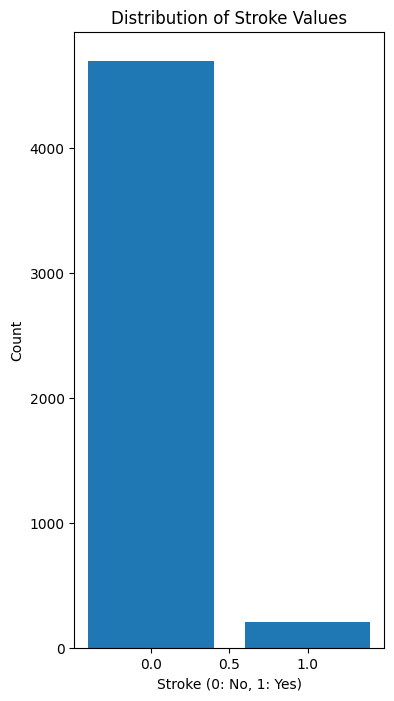

In [ ]:
plt.figure(figsize=(4, 8))
value_counts = df['stroke'].value_counts() #stroke' 컬럼의 각 값의 갯수를 계산
plt.bar(value_counts.index, value_counts.values) # 바 차트를 생성
plt.title("Distribution of Stroke Values")  # 차트 제목
plt.xlabel("Stroke (0: No, 1: Yes)") #축 라벨을 추가
plt.ylabel("Count")
plt.show()
#1 값이 매우 적음

- 뇌졸중 발생이 아예 안 드러나는 경우 있고 뇌졸중 결과가 드러나며 상관관계가 있을 것으로 추측되는 경우 확인 됨

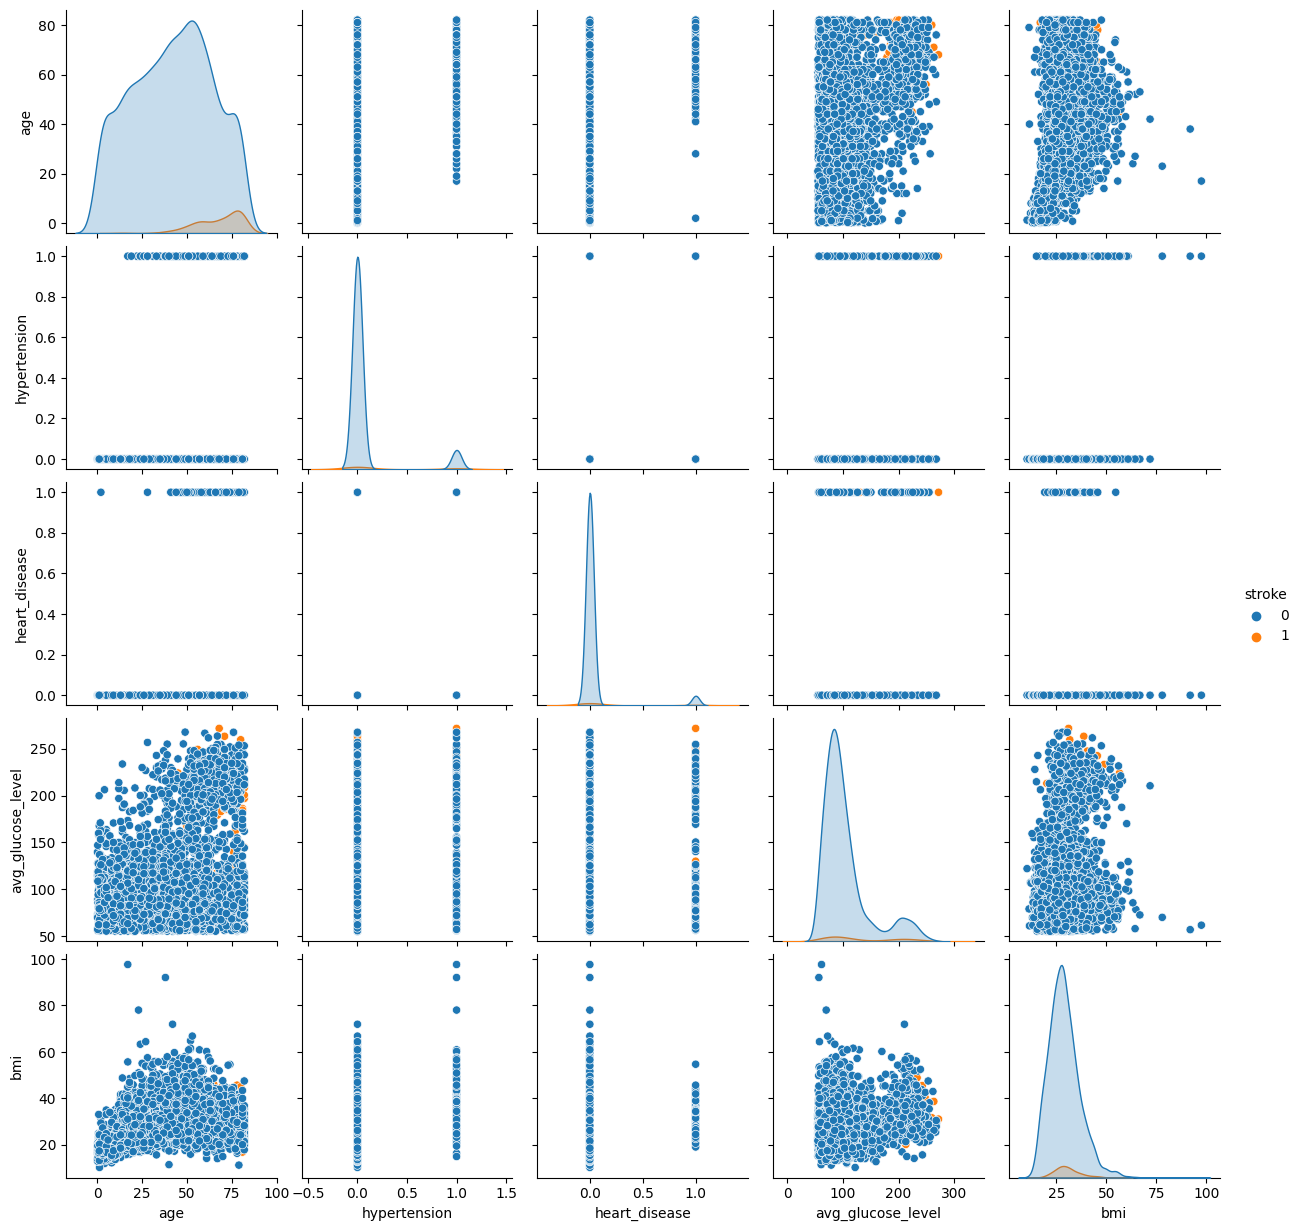

In [ ]:
#수치형 데이터만 분포 확인 ->이상치 확인
sns.pairplot(vars=['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'],
             hue = 'stroke', data = df)
plt.show()
#object 문자 데이터(gender, ever_married, work_type, work_type, Residence_type, smoking_status)

In [60]:
from sklearn.preprocessing import OneHotEncoder
oh_enc = OneHotEncoder()
gender_encoded = oh_enc.fit_transform(df[['gender']])
columns_names = oh_enc.get_feature_names_out(input_features=['gender'])
gender_encoded

<4908x2 sparse matrix of type '<class 'numpy.float64'>'
	with 4908 stored elements in Compressed Sparse Row format>

In [61]:
en_gender = pd.DataFrame(gender_encoded.toarray(), columns = columns_names) #젠더 원핫인코딩
en_gender

,gender_Female,gender_Male
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
4903,1.0,0.0
4904,1.0,0.0
4905,1.0,0.0
4906,0.0,1.0


In [62]:
#ever_married 원핫인코딩
ever_married_encoded = oh_enc.fit_transform(df[['ever_married']])
en_ever_married = pd.DataFrame(ever_married_encoded.toarray(), columns = oh_enc.categories_)
en_ever_married

,No,Yes
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
4903,1.0,0.0
4904,0.0,1.0
4905,0.0,1.0
4906,0.0,1.0


In [63]:
#work_type 원핫인코딩
work_type_encoded = oh_enc.fit_transform(df[['work_type']])
en_work_type = pd.DataFrame(work_type_encoded.toarray(), columns = oh_enc.categories_)
en_work_type

,Govt_job,Never_worked,Private,Self-employed,children
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
4903,0.0,0.0,0.0,0.0,1.0
4904,0.0,0.0,0.0,1.0,0.0
4905,0.0,0.0,0.0,1.0,0.0
4906,0.0,0.0,1.0,0.0,0.0


In [64]:
#Residence_type 원핫인코딩
Residence_type_encoded = oh_enc.fit_transform(df[['Residence_type']])
en_Residence_type = pd.DataFrame(Residence_type_encoded.toarray(), columns = oh_enc.categories_)
en_Residence_type

,Rural,Urban
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0
...,...,...
4903,1.0,0.0
4904,0.0,1.0
4905,1.0,0.0
4906,1.0,0.0


In [65]:
#smoking_status 원핫인코딩
smoking_status_encoded = oh_enc.fit_transform(df[['smoking_status']])
en_smoking_status = pd.DataFrame(smoking_status_encoded.toarray(), columns = oh_enc.categories_)
en_smoking_status

,Unknown,formerly smoked,never smoked,smokes
0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
4903,1.0,0.0,0.0,0.0
4904,0.0,0.0,1.0,0.0
4905,0.0,0.0,1.0,0.0
4906,0.0,1.0,0.0,0.0


In [71]:
df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1


In [74]:
df.reset_index(drop=True, inplace=True)
en_smoking_status.reset_index(drop=True, inplace=True)
en_Residence_type.reset_index(drop=True, inplace=True)
en_work_type.reset_index(drop=True, inplace=True)
en_ever_married.reset_index(drop=True, inplace=True)
en_gender.reset_index(drop=True, inplace=True)

In [75]:
en_df = pd.concat([df, en_smoking_status, en_Residence_type, en_work_type, en_ever_married, en_gender], axis=1)
en_df.tail(20)
# 'age', 'avg_glucose_level', 'bmi'

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,...,"(Urban,)","(Govt_job,)","(Never_worked,)","(Private,)","(Self-employed,)","(children,)","(No,)","(Yes,)",gender_Female,gender_Male
4888,Female,63.00,0,0,Yes,Self-employed,Rural,75.93,34.7,formerly smoked,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4889,Female,64.00,1,0,Yes,Self-employed,Urban,76.89,30.2,Unknown,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4890,Female,0.72,0,0,No,children,Rural,62.13,16.8,Unknown,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4891,Male,26.00,0,0,No,Govt_job,Rural,100.85,21.0,smokes,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4892,Male,59.00,1,0,Yes,Private,Rural,95.05,30.9,never smoked,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4893,Male,76.00,0,0,Yes,Govt_job,Urban,82.35,38.9,never smoked,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4894,Male,13.00,0,0,No,children,Urban,82.38,24.3,Unknown,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4895,Male,1.08,0,0,No,children,Rural,79.15,17.4,Unknown,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4896,Male,57.00,0,0,Yes,Govt_job,Rural,76.62,28.2,never smoked,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4897,Male,68.00,0,0,Yes,Self-employed,Urban,91.68,40.8,Unknown,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [76]:
en_df.drop(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], inplace = True, axis = 1) #기존 카테고리컬럼 삭제
en_df.head(3)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,"(Unknown,)","(formerly smoked,)","(never smoked,)","(smokes,)",...,"(Urban,)","(Govt_job,)","(Never_worked,)","(Private,)","(Self-employed,)","(children,)","(No,)","(Yes,)",gender_Female,gender_Male
0,67.0,0,1,228.69,36.6,1,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,80.0,0,1,105.92,32.5,1,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,49.0,0,0,171.23,34.4,1,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [77]:
X = en_df.drop('stroke', axis = 1)
y = en_df['stroke']
print(y)

0       1
1       1
2       1
3       1
4       1
       ..
4903    0
4904    0
4905    0
4906    0
4907    0
Name: stroke, Length: 4908, dtype: int64


In [78]:
from sklearn.model_selection import train_test_split

# X = en_df.drop('stroke', axis = 1)
# y = en_df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, shuffle = True)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3681, 20)
(1227, 20)
(3681,)
(1227,)


In [79]:
X_train.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,"(Unknown,)","(formerly smoked,)","(never smoked,)","(smokes,)","(Rural,)","(Urban,)","(Govt_job,)","(Never_worked,)","(Private,)","(Self-employed,)","(children,)","(No,)","(Yes,)",gender_Female,gender_Male
3871,54.0,0,0,247.97,36.1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4685,16.0,0,0,82.44,32.6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3313,34.0,0,0,91.02,25.8,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2664,14.0,0,0,108.65,23.1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
137,78.0,0,0,133.19,23.6,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
# from sklearn.preprocessing import MinMaxScaler #모든 피처들이 0과 1사이의 데이터값을 갖도록
# # MinMaxScaler 객체 생성 후, train 데이터의 수치형 컬럼에 적용
# scaler = MinMaxScaler()

# X_train_numeric = X_train[['age', 'avg_glucose_level', 'bmi']] # 수치형 컬럼 선택
# X_train_numeric_scaled = scaler.fit_transform(X_train_numeric)
# X_train[['age', 'avg_glucose_level', 'bmi']] = X_train_numeric_scaled

# # Test 데이터의 수치형 컬럼에 train 데이터의 스케일러를 그대로 사용
# X_test_numeric = X_test[['age', 'avg_glucose_level', 'bmi']] # 수치형 컬럼 선택
# X_test_numeric_scaled = scaler.transform(X_test_numeric) #test는 fit 안 했음
# X_test[['age', 'avg_glucose_level', 'bmi']] = X_test_numeric_scaled

- 수치형 데이터에 스탠다드스케일러 적용(트레인/테스트 각각(테스트에는 fit 안 함))

In [80]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

X_train_numeric = X_train[['age', 'avg_glucose_level', 'bmi']]
X_train_numeric_scaled = std_scaler.fit_transform(X_train_numeric)
X_train[['age', 'avg_glucose_level', 'bmi']] = X_train_numeric_scaled

X_test_numeric = X_test[['age', 'avg_glucose_level', 'bmi']] # 수치형 컬럼 선택
X_test_numeric_scaled = std_scaler.transform(X_test_numeric) #test는 fit 안 했음
X_test[['age', 'avg_glucose_level', 'bmi']] = X_test_numeric_scaled

In [81]:
print(X_train.head(3))
print(X_test.head(3))

           age  hypertension  heart_disease  avg_glucose_level       bmi  \
3871  0.477883             0              0           3.188562  0.908820   
4685 -1.217755             0              0          -0.520728  0.464359   
3313 -0.414558             0              0          -0.328462 -0.399164   

      (Unknown,)  (formerly smoked,)  (never smoked,)  (smokes,)  (Rural,)  \
3871         0.0                 1.0              0.0        0.0       0.0   
4685         1.0                 0.0              0.0        0.0       1.0   
3313         0.0                 0.0              1.0        0.0       0.0   

      (Urban,)  (Govt_job,)  (Never_worked,)  (Private,)  (Self-employed,)  \
3871       1.0          0.0              0.0         1.0               0.0   
4685       0.0          0.0              0.0         0.0               0.0   
3313       1.0          0.0              0.0         1.0               0.0   

      (children,)  (No,)  (Yes,)  gender_Female  gender_Male  
3871  

박스 플롯 (Box Plot):
박스 플롯은 데이터의 분포를 시각화하는데 사용되며, 데이터의 중간값, 이상치(outliers), 최솟값과 최댓값을 표현할 수 있습니다. 스탠다드 스케일링과 원핫 인코딩을 적용한 데이터의 분포를 보여줄 때 유용합니다.

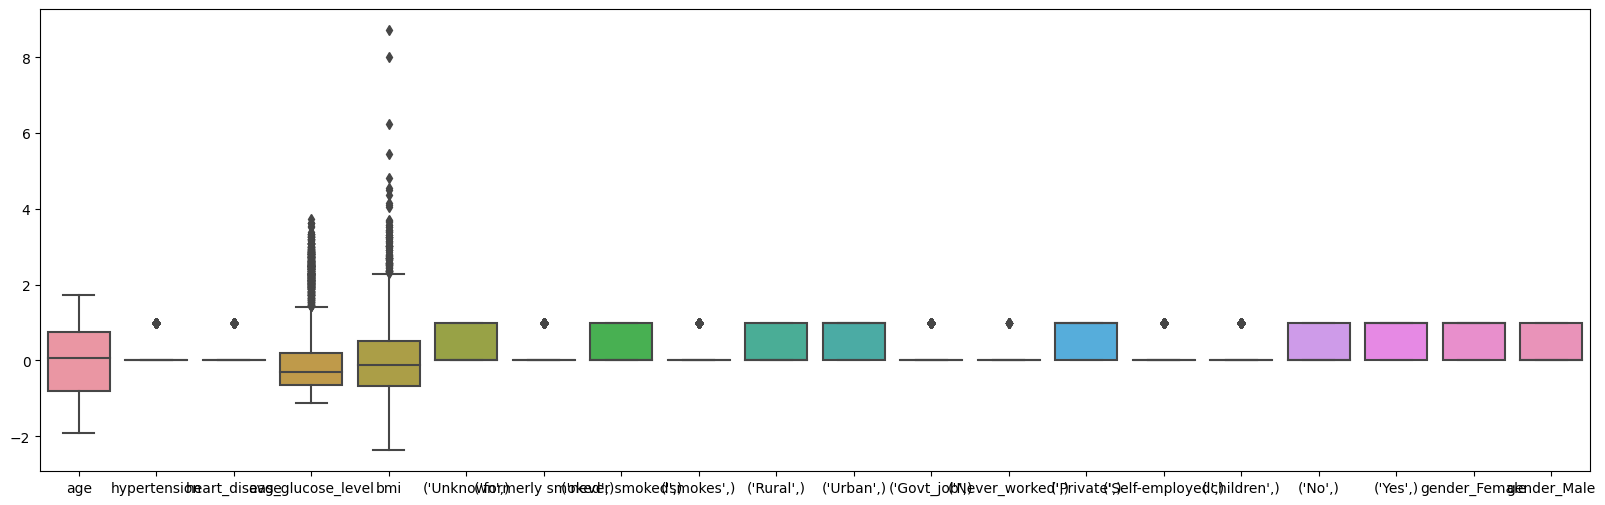

In [95]:
fig = plt.figure(figsize=(20, 6))
sns.boxplot(data=X_train)
plt.show()

In [87]:
import matplotlib.pyplot as plt

<Figure size 2000x2000 with 0 Axes>

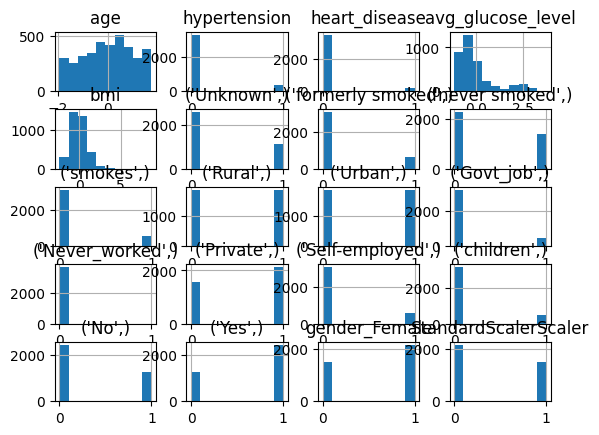

In [93]:
fig = plt.figure(figsize=(20, 20))
X_train.hist()
plt.title('StandardScalerScaler')
plt.show()

min_samples_leaf를 다른 하이퍼파라미터들과 함께 튜닝하면 더욱 좋은 결과를 얻을 수 있습니다. 예를 들어, max_depth와 min_samples_leaf를 함께 튜닝하는 것이 모델의 성능을 개선하는데 도움이 될 수 있습니다.

In [100]:
#데이터의 특성 이름(feature names)에 문제가 있을 때 발생합니다. 해당 오류는 입력 데이터의 특성 이름이 문자열(string)이 아닌 다른 형태의 데이터(예: 튜플(tuple))를 포함하고 있기 때문에 발생합니다.
X_train.columns = X_train.columns.astype(str)

In [120]:
X_test.columns = X_test.columns.astype(str)

In [116]:
from sklearn.model_selection import GridSearchCV #하이퍼 파라미터 튜닝
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Decision Tree 객체 생성
DTC = DecisionTreeClassifier(random_state=42)

# param_grid 설정
dtc_param_grid = {
            "criterion" : ["gini", "entropy"],
            "max_depth" :   np.arange(2,30,1), #validation 성능이 최대가 되는 max_depth를 찾아야한다.
            "min_samples_leaf" : np.arange(1,100,1), #리프 노드에 포함되어야 하는 최소 샘플 수를 지정하는 하이퍼파라미터(1부터 99까지 1씩 증가하면서 튜닝될 것)
            "class_weight": [{0: 1, 1: w} for w in range(18, 30)]}
# Grid Search 객체 생성
gsDTC = GridSearchCV(DTC,
                     param_grid = dtc_param_grid,
                     cv=4,
                     scoring = 'recall',#평가방법 설정
                     n_jobs= 4,#n_jobs : multiprocessing 병렬연산 / 4명이 동시에 일하는 것.
                     verbose = 1) #verbose : 내부 진행되는 과정에 대한 설명해주는 기능.

# Grid Search 실행
gsDTC.fit(X_train,y_train)

Fitting 4 folds for each of 66528 candidates, totalling 266112 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=4,
             param_grid={'class_weight': [{0: 1, 1: 18}, {0: 1, 1: 19},
                                          {0: 1, 1: 20}, {0: 1, 1: 21},
                                          {0: 1, 1: 22}, {0: 1, 1: 23},
                                          {0: 1, 1: 24}, {0: 1, 1: 25},
                                          {0: 1, 1: 26}, {0: 1, 1: 27},
                                          {0: 1, 1: 28}, {0: 1, 1: 29}],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 2..., 29]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='recall', verbose=1)

In [117]:
# 최적의 파라미터 조합 출력
DTC_best = gsDTC.best_estimator_
print(DTC_best)

# scoring에 따른 최고 점수(recall) 출력
print(gsDTC.best_score_)

print(gsDTC.best_params_)

DecisionTreeClassifier(class_weight={0: 1, 1: 27}, criterion='entropy',
                       max_depth=2, random_state=42)
0.961698717948718
{'class_weight': {0: 1, 1: 27}, 'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1}


- DTC_best:  Grid Search를 통해 성능이 최적화된 DTC_best의 하이퍼 파라미터 조합은 max_depth=6, min_samples_leaf=9, random_state=42
-  precision 평가 지표가 약 0.302로 낮게 나왔으므로 해당 모델의 성능을 개선하거나 다른 평가 지표에 대해도 평가해 볼 필요, 모델의 성능 향상을 위해서는 여러 번의 실험과 평가가 필요하며, 적절한 평가 지표 선택과 하이퍼파라미터 튜닝이 중요

#DecisionTree

In [141]:
#디시전트리
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

# Decision Tree 객체 생성 및 하이퍼파라미터 설정
DTC = DecisionTreeClassifier(max_depth=2, min_samples_leaf=1, random_state=42, class_weight={1:27}, criterion='entropy')
# Train 데이터로 모델 학습
DTC.fit(X_train, y_train)

# Train 데이터에 대한 예측 및 정확도 출력
y_pred_train = DTC.predict(X_train)
y_pred_test = DTC.predict(X_test)
print("DecisionTree Results")
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Train Accuracy: ", train_accuracy)
train_recall = recall_score(y_train, y_pred_train)
print("Train Recall: ", train_recall, "\n")
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy: ", test_accuracy)
test_recall = recall_score(y_test, y_pred_test)
print("Test Recall: ", test_recall)

DecisionTree Results
Train Accuracy:  0.5349089921217061
Train Recall:  0.9617834394904459 

Test Accuracy:  0.560717196414018
Test Recall:  0.9615384615384616


In [143]:
from sklearn.metrics import classification_report
print("Train 분류 보고서")
print(classification_report(y_train, y_pred_train))

Train 분류 보고서
              precision    recall  f1-score   support

           0       1.00      0.52      0.68      3524
           1       0.08      0.96      0.15       157

    accuracy                           0.53      3681
   macro avg       0.54      0.74      0.41      3681
weighted avg       0.96      0.53      0.66      3681



In [144]:
print("Test 분류 보고서")
print(classification_report(y_test, y_pred_test))

Test 분류 보고서
              precision    recall  f1-score   support

           0       1.00      0.54      0.70      1175
           1       0.09      0.96      0.16        52

    accuracy                           0.56      1227
   macro avg       0.54      0.75      0.43      1227
weighted avg       0.96      0.56      0.68      1227



Confusion Matrix:
[[638 537]
 [  2  50]]
 - 클래스 0에 속하는 샘플 638개가 실제로 0으로 예측되었고, 50개가 1로 잘못 예측되었습니다.
클래스 1에 속하는 샘플 50개가 실제로 1로 예측되었고, 2개가 0으로 잘못 예측되었습니다.
- True Negative (TN): 클래스 0에 속하는 샘플 638개가 정확하게 0으로 분류되었습니다.
- False Positive (FP): 클래스 0에 속하는 샘플 50개가 1로 잘못 분류되었습니다.
- False Negative (FN): 클래스 1에 속하는 샘플 2개가 0으로 잘못 분류되었습니다.
- True Positive (TP): 클래스 1에 속하는 샘플 50개가 정확하게 50로 분류되었습니다.

In [128]:
# 테스트 데이터에 대한 오차 행렬 계산
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[638 537]
 [  2  50]]


In [125]:
DTC.predict_proba(X_test)[:10] # 테스트 데이터에 대한 예측 확률

array([[0.80049261, 0.19950739],
       [0.80049261, 0.19950739],
       [1.        , 0.        ],
       [0.80049261, 0.19950739],
       [0.44733904, 0.55266096],
       [0.80049261, 0.19950739],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.44733904, 0.55266096],
       [0.44733904, 0.55266096]])

In [126]:
#변수 중요도
DTC.feature_importances_ 

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

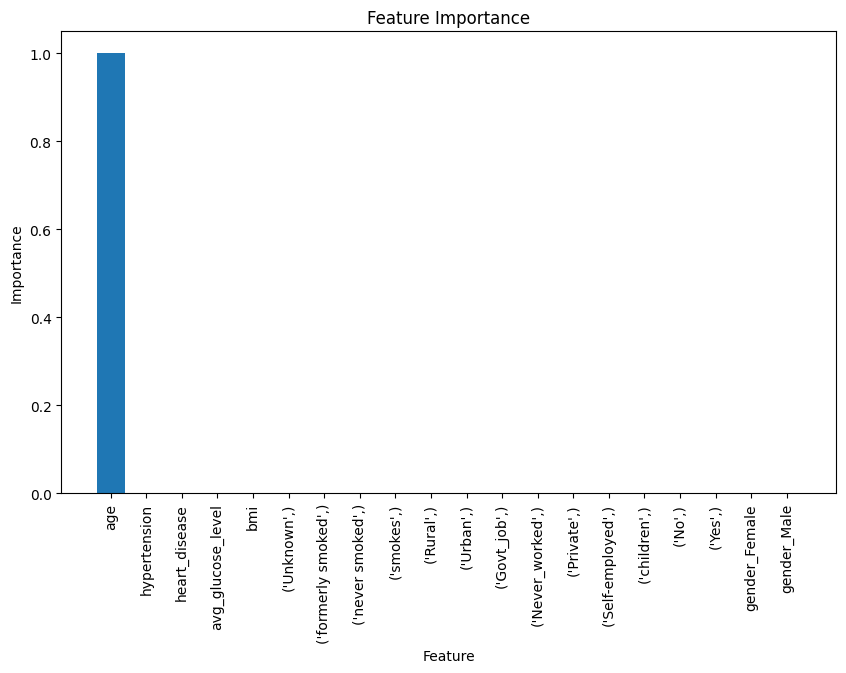

In [127]:
feature_importance = DTC.feature_importances_

# 각 특성의 중요도를 막대 그래프로 시각화
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance, align='center')
plt.xticks(range(len(feature_importance)), X_train.columns, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

- 특성 중요도 결과 : 나이
  지난번 시도 결과 : 당수치 > 체질량 지수 > 나이 > 고혈압 > 심장 질환
    1. 'avg_glucose_level': 평균 혈당 수치
    2. 'bmi': 체질량 지수
    3. 'age': 나이
    4. 'hypertension': 고혈압
    5. 'heart_disease': 심장 질환

In [131]:
X_train.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,"('Unknown',)","('formerly smoked',)","('never smoked',)","('smokes',)","('Rural',)","('Urban',)","('Govt_job',)","('Never_worked',)","('Private',)","('Self-employed',)","('children',)","('No',)","('Yes',)",gender_Female,gender_Male
count,3.681000e+03,3681.000000,3681.000000,3.681000e+03,3.681000e+03,3681.000000,3681.000000,3681.000000,3681.000000,3681.000000,3681.000000,3681.000000,3681.000000,3681.000000,3681.000000,3681.000000,3681.000000,3681.000000,3681.000000,3681.000000
mean,5.211805e-17,0.093725,0.047541,-4.825745e-17,5.752288e-16,0.300733,0.169519,0.377886,0.151861,0.498778,0.501222,0.128498,0.004075,0.577832,0.157838,0.131758,0.337952,0.662048,0.590329,0.409671
std,1.000136e+00,0.291485,0.212823,1.000136e+00,1.000136e+00,0.458639,0.375261,0.484925,0.358935,0.500066,0.500066,0.334689,0.063714,0.493972,0.364638,0.338273,0.473076,0.473076,0.491840,0.491840
min,-1.928138e+00,0.000000,0.000000,-1.130689e+00,-2.367489e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.161563e-01,0.000000,0.000000,-6.368041e-01,-6.785392e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.628494e-02,0.000000,0.000000,-3.056055e-01,-1.070900e-01,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,7.456159e-01,0.000000,0.000000,1.869348e-01,5.151546e-01,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.727301e+00,1.000000,1.000000,3.721214e+00,8.718625e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [147]:
import pickle

with open("dtc_model.pkl", "wb") as f:
    pickle.dump(DTC, f)

In [8]:
import pickle

with open("dtc_model.pkl", "rb") as f:
    DTC_loaded = pickle.load(f)

# 불러온 모델로 예측 수행
y_pred = DTC_loaded.predict(X_test)

# 예측 결과 확인
print(y_pred)

NameError: name 'X_test' is not defined

#RandomForest

In [ ]:
#랜덤포레스트
from sklearn.ensemble import RandomForestClassifier as RFC

forest = RFC(criterion='gini', n_estimators=160, random_state=42, n_jobs=1) #n_jobs=1 병렬처리에 사용될 cpu코어의 개수 사용하지 않음.
forest.fit(X_train, y_train) #fit 모델 학습

RandomForestClassifier(n_estimators=160, n_jobs=1, random_state=42)

In [ ]:
forest.score(X_train, y_train) #train 성능평가점수(Accurcy)

1.0

In [ ]:
forest.score(X_test, y_test) #test 성능평가점수(Accurcy)  n_estimators 수치 = 깊이 올렸더니 test 성능 올라갔음.

0.9535452322738386

In [ ]:
# 정확도 계산
y_pred_train = forest.predict(X_train)
y_pred_test = forest.predict(X_test)

print("RandomForest Results")
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Train Accuracy: ", train_accuracy)

test_accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy: ", test_accuracy)

RandomForest Results
Train Accuracy:  1.0
Test Accuracy:  0.9535452322738386
